In [1]:
data <- read.csv('/Users/alessia/Desktop/shooting/shooting.csv')

library("dplyr")

# select columns
shooting <- (select(data, c(Day.of.Week, Month, Year, State, Urban.Suburban.Rural, Location, Insider.or.Outsider,
                   Multiple.Locations, Armed.Person.on.Scene, Number.Killed, Number.Injured,
                   Age, Gender, Race, Immigrant, Military.Service, Criminal.Record,
                   Bully, Bullied, Signs.of.Being.in.Crisis, Motive..Racism.Xenophobia, Motive..Religious.Hate,
                   Motive..Misogyny, Motive..Homophobia, Motive..Employment.Issue, Motive..Economic.Issue,
                   Motive..Legal.Issue, Motive..Relationship.Issue, Motive..Interpersonal.Conflict., Motive..Fame.Seeking,
                   Leakage., Interest.in.Past.Mass.Violence, Relationship.with.Other.Shooting.s., Planning,
                   Performance)))


Caricamento pacchetto: ‘dplyr’


I seguenti oggetti sono mascherati da ‘package:stats’:

    filter, lag


I seguenti oggetti sono mascherati da ‘package:base’:

    intersect, setdiff, setequal, union




In [2]:
# exploration
summary(shooting)

 Day.of.Week            Month             Year         State          
 Length:198         Min.   : 1.000   Min.   :1966   Length:198        
 Class :character   1st Qu.: 3.000   1st Qu.:1993   Class :character  
 Mode  :character   Median : 7.000   Median :2006   Mode  :character  
                    Mean   : 6.574   Mean   :2003                     
                    3rd Qu.:10.000   3rd Qu.:2017                     
                    Max.   :12.000   Max.   :2023                     
                    NA's   :1        NA's   :1                        
 Urban.Suburban.Rural    Location      Insider.or.Outsider Multiple.Locations
 Min.   :0.0000       Min.   : 0.000   Min.   :0.0000      Min.   :0.000     
 1st Qu.:0.0000       1st Qu.: 4.000   1st Qu.:0.0000      1st Qu.:0.000     
 Median :0.0000       Median : 5.000   Median :1.0000      Median :0.000     
 Mean   :0.7107       Mean   : 5.041   Mean   :0.5025      Mean   :0.335     
 3rd Qu.:1.0000       3rd Qu.: 8.000   3rd

In [3]:
# remove first row of the dataset (description)
shooting <- shooting[-c(1), ]

# check for na
sum(is.na(shooting))
# there are 4 missing values

# replace 'Moroccan' in Race with 6
shooting$Race <- ifelse(shooting$Race == 'Moroccan', 6, shooting$Race)
# replace missing values in Immigrant with mode
shooting$Immigrant[is.na(shooting$Immigrant)] <- 0
# replace empty strings in Race with mode
shooting$Race <- ifelse(shooting$Race == '', 0, shooting$Race)
# replace na in Bully with mode
shooting$Bully[is.na(shooting$Bully)] <- 0
# replace na in Bullied with mode
shooting$Bullied[is.na(shooting$Bullied)] <- 0

[1] 4

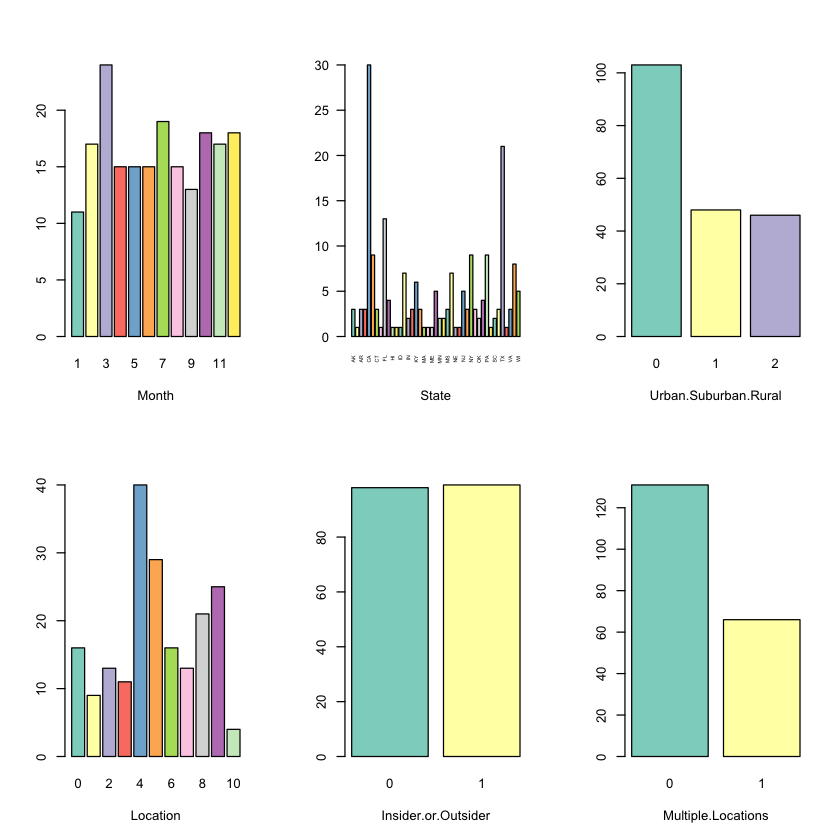

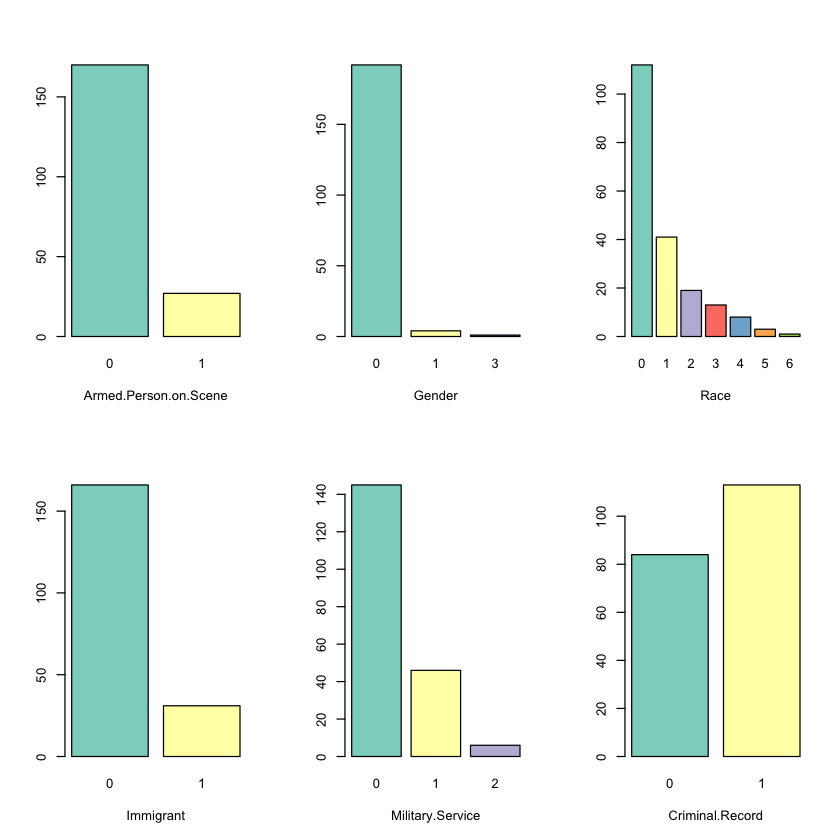

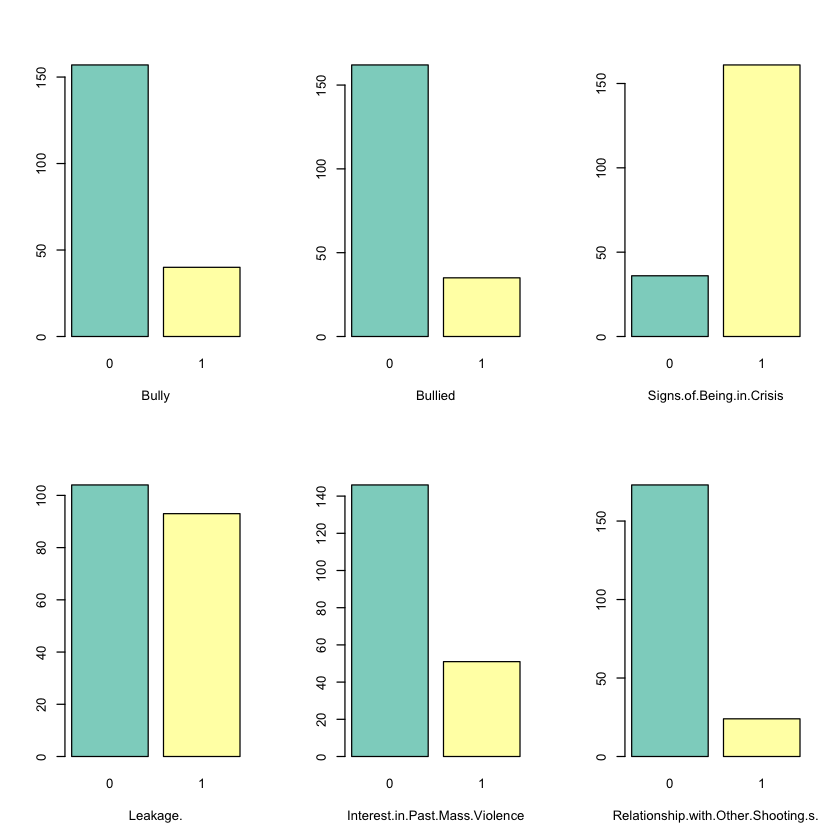

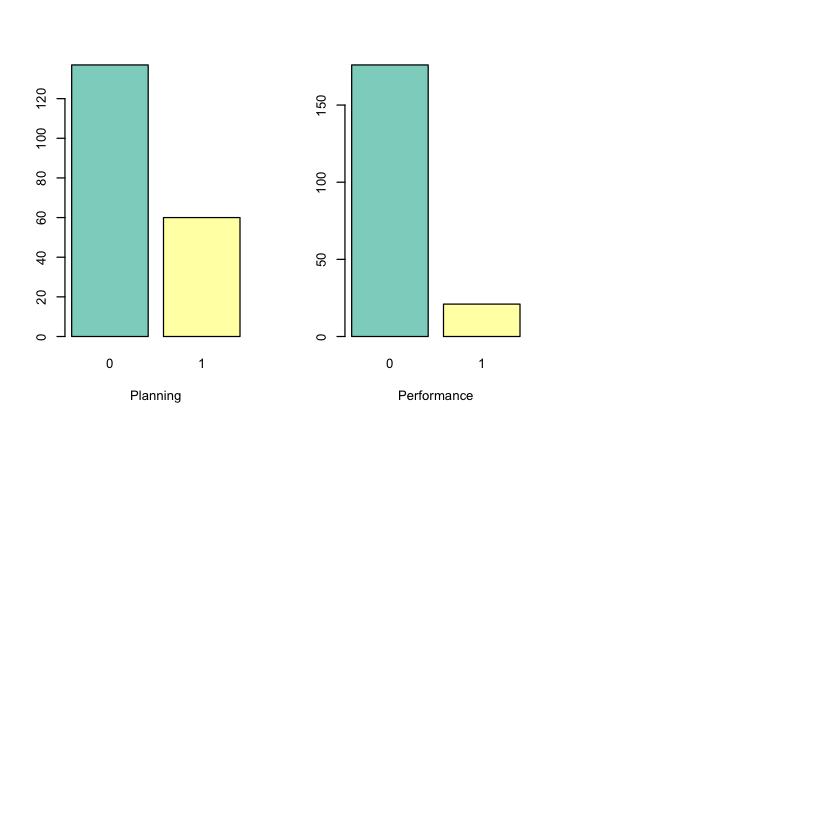

In [4]:
# visualize variables
library(RColorBrewer)

# categorical variables as barplots
par(mfrow = c(2, 3))
barplot(table(shooting$Month), xlab = 'Month', col = brewer.pal(12, "Set3"))
barplot(table(shooting$State), xlab = 'State', col = brewer.pal(12, "Set3"), las = 2, cex.names = 0.4) 
barplot(table(shooting$Urban.Suburban.Rural), xlab = 'Urban.Suburban.Rural', col = brewer.pal(12, "Set3"))
barplot(table(shooting$Location), xlab = 'Location', col = brewer.pal(12, 'Set3'))
barplot(table(shooting$Insider.or.Outsider), xlab = 'Insider.or.Outsider', col = brewer.pal(12, 'Set3'))
barplot(table(shooting$Multiple.Locations), xlab = 'Multiple.Locations', col = brewer.pal(12, 'Set3'))
barplot(table(shooting$Armed.Person.on.Scene), xlab = 'Armed.Person.on.Scene', col = brewer.pal(12, 'Set3'))
barplot(table(shooting$Gender), xlab = 'Gender', col = brewer.pal(12, 'Set3'))
barplot(table(shooting$Race), xlab = 'Race', col = brewer.pal(12, 'Set3'))
barplot(table(shooting$Immigrant), xlab = 'Immigrant', col = brewer.pal(12, 'Set3'))
barplot(table(shooting$Military.Service), xlab = 'Military.Service', col = brewer.pal(12, 'Set3'))
barplot(table(shooting$Criminal.Record), xlab = 'Criminal.Record', col = brewer.pal(12, 'Set3'))
barplot(table(shooting$Bully), xlab = 'Bully', col = brewer.pal(12, 'Set3'))
barplot(table(shooting$Bullied), xlab = 'Bullied', col = brewer.pal(12, 'Set3'))
barplot(table(shooting$Signs.of.Being.in.Crisis), xlab = 'Signs.of.Being.in.Crisis', col = brewer.pal(12, 'Set3'))
barplot(table(shooting$Leakage.), xlab = 'Leakage.', col = brewer.pal(12, 'Set3'))
barplot(table(shooting$Interest.in.Past.Mass.Violence), xlab = 'Interest.in.Past.Mass.Violence', col = brewer.pal(12, 'Set3'))
barplot(table(shooting$Relationship.with.Other.Shooting.s.), xlab = 'Relationship.with.Other.Shooting.s.', col = brewer.pal(12, 'Set3'))
barplot(table(shooting$Planning), xlab = 'Planning', col = brewer.pal(12, "Set3"))
barplot(table(shooting$Performance), xlab = 'Performance', col = brewer.pal(12, "Set3"))

- March is by far the month in which more mass shootings happen. Furthermore, January doesn't see many mass shootings.- In California and Texas, more mass shootings happen, compared to all other States. Florida also sees quite a number of mass shootings.- As expected, more mass shootings happen in urban areas.- Most mass shootings happen in retail stores and restaurants or warehouses/factories.- Mass shootings are equally likely to be perpetrated by insiders (shooter had an existing relationship with the shooting site) or outsiders.- Most mass shootings only take place at one location- Constistently with previous studies, most perpetrators are males.- Most mass shooters are white, also consistently with previous studies- Most perpetrators have a criminal record- Most perpetrators showed signs of being in crisis prior to the attack- Leakage of information about the intentions of the shooter happens almost half of the time- Most shooters did not show signs of interest in past episodes of mass violence, nor had relationships with prior shooters- Not all mass shooters actually plan the attack- Only a minor part of the shooters treats the attack as a performance play

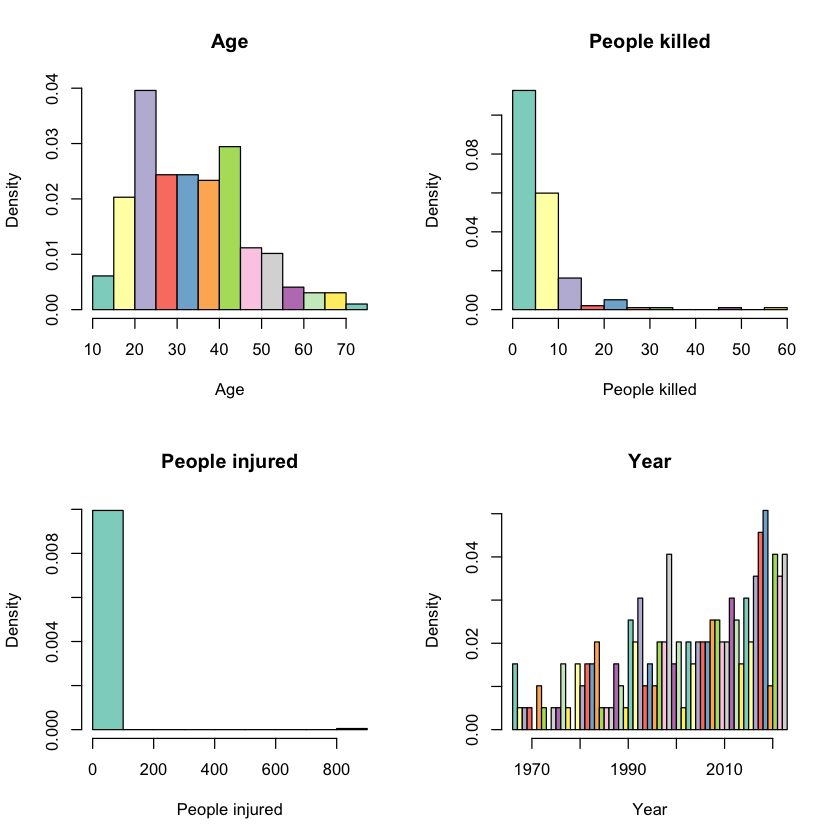

In [5]:
# continuous variables through histograms
par(mfrow = c(2, 2))
shooting$Age <- as.numeric(shooting$Age)
hist(shooting$Age, freq = FALSE, xlab = 'Age', col = brewer.pal(12, 'Set3'), main = 'Age')
# most shooters are young adults
shooting$Number.Killed <- as.numeric(shooting$Number.Killed)
hist(shooting$Number.Killed, freq = FALSE, xlab = 'People killed', col = brewer.pal(12, 'Set3'), main = 'People killed')

shooting$Number.Injured <- as.numeric(shooting$Number.Injured)
hist(shooting$Number.Injured, freq = FALSE, xlab = 'People injured', col = brewer.pal(12, 'Set3'), main = 'People injured')
# There is a huge outlier, visible on the histogram, regarding the number of people injured in the Las Vegas shooting in 2017 (more than 800).

shooting$Year <- as.numeric(shooting$Year)
hist(shooting$Year, freq = F, xlab = 'Year', col = brewer.pal(12, 'Set3'), main = 'Year', breaks = seq(min(shooting$Year), max(shooting$Year), by = 1))
# mass shootings are on the rise in recent years

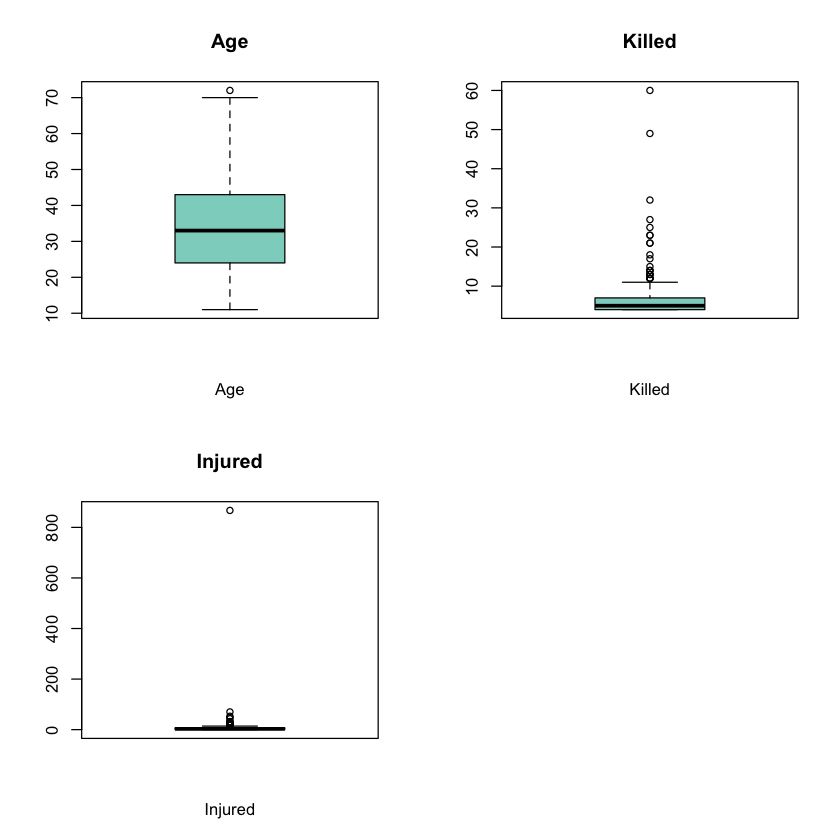

In [6]:
# continuous variables as boxplots
par(mfrow = c(2,2))
boxplot(shooting$Age, freq = F, main = 'Age', xlab = 'Age', col = brewer.pal(12, 'Set3'))
boxplot(shooting$Number.Killed, freq = F, main = 'Killed', xlab = 'Killed', col = brewer.pal(12, 'Set3'))
boxplot(shooting$Number.Injured, freq = F, main = 'Injured', xlab = 'Injured', col = brewer.pal(12, 'Set3'))

The default of 'doScale' is FALSE now for stability;
  set options(mc_doScale_quiet=TRUE) to suppress this (once per session) message



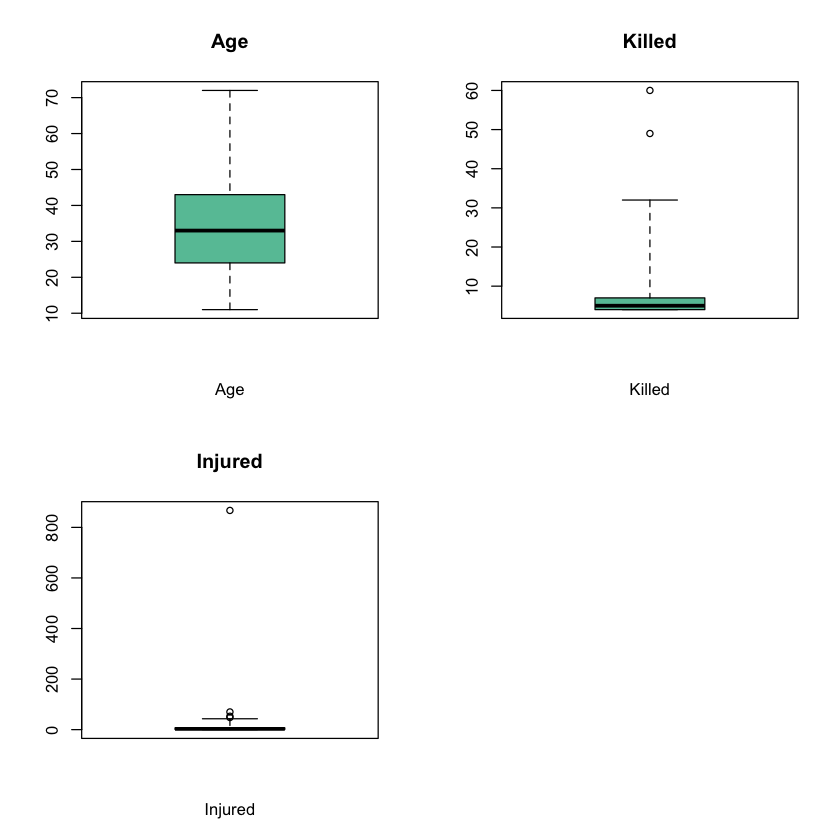

In [7]:
library(robustbase)
# adjusted boxplots, since the distributions are not normal
par(mfrow = c(2,2))
adjbox(shooting$Age, freq = F, main = 'Age', xlab = 'Age', col = brewer.pal(3, 'Set2'))
adjbox(shooting$Number.Killed, freq = F, main = 'Killed', xlab = 'Killed', col = brewer.pal(3, 'Set2'))
adjbox(shooting$Number.Injured, freq = F, main = 'Injured', xlab = 'Injured', col = brewer.pal(3, 'Set2'))

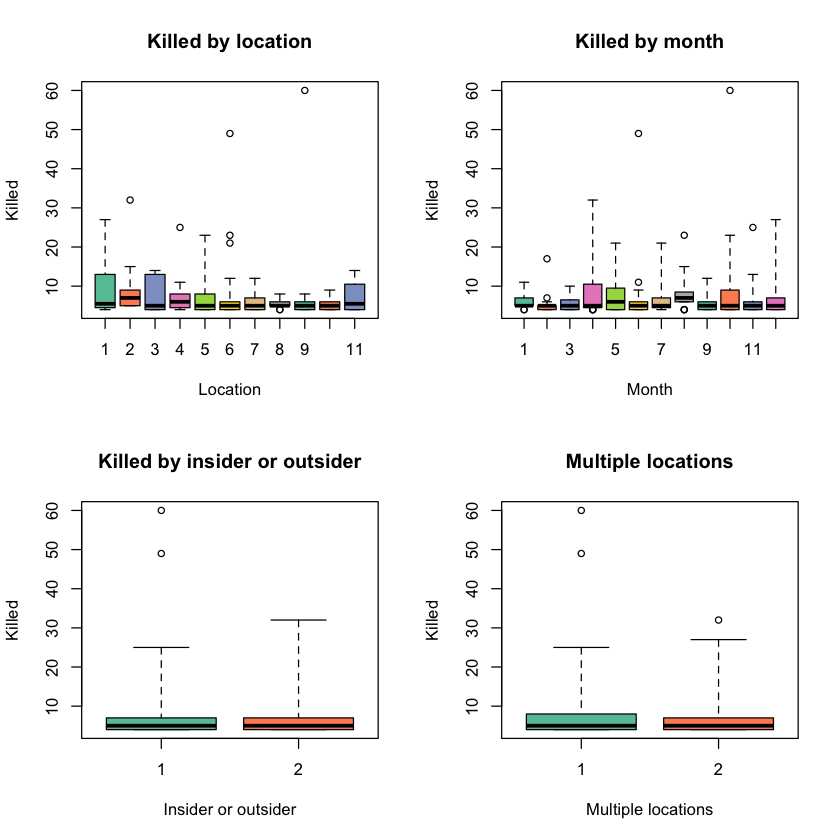

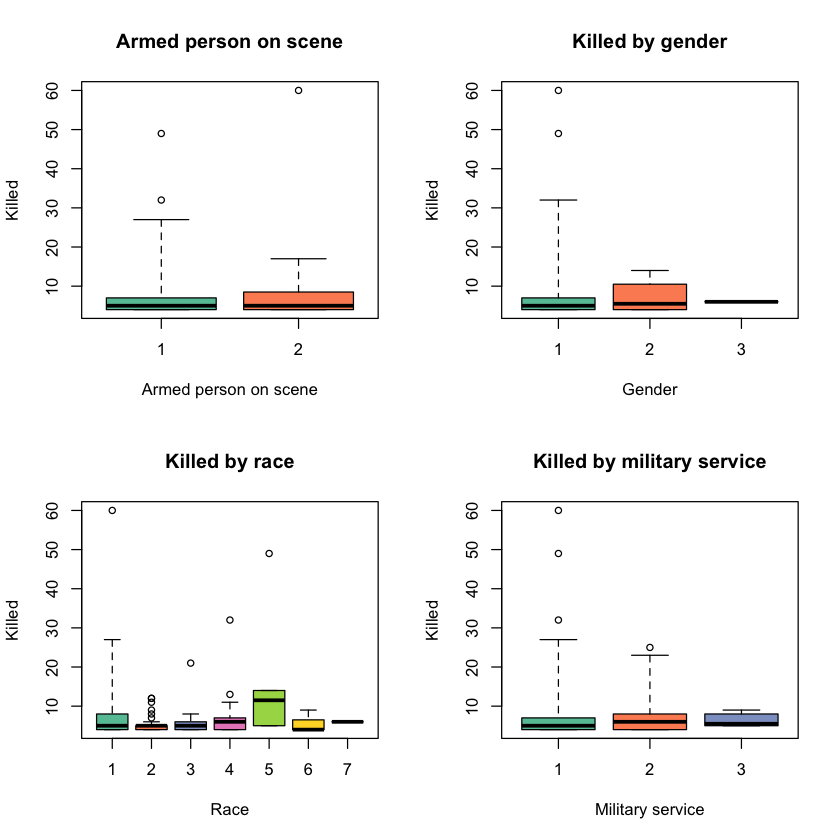

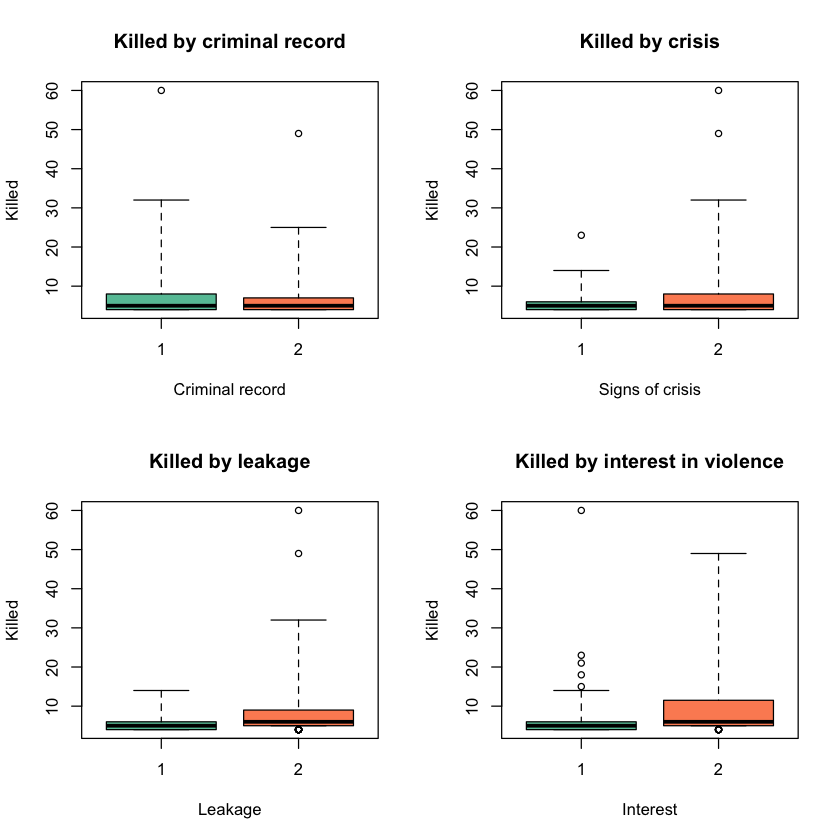

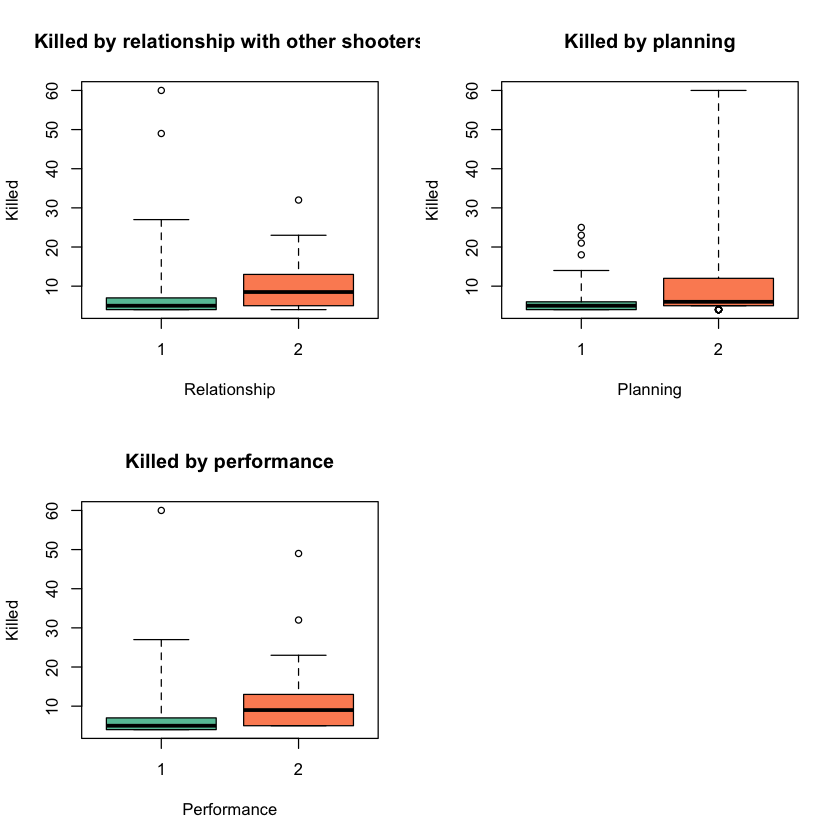

In [8]:
# visualize adjusted boxplots depending on level of categorical variable
par(mfrow = c(2,2))
adjbox(shooting$Number.Killed ~ shooting$Location, freq = F, main = 'Killed by location', xlab = 'Location', ylab ='Killed', col = brewer.pal(8, 'Set2'))
# thanks to the adjusted boxplots, we now see that the deadliest shootings do not happen in retail stores
adjbox(shooting$Number.Killed ~ shooting$Month, freq = F, main = 'Killed by month', xlab = 'Month', ylab ='Killed', col = brewer.pal(8, 'Set2'))
adjbox(shooting$Number.Killed ~ shooting$Insider.or.Outsider, freq = F, main = 'Killed by insider or outsider', xlab = 'Insider or outsider', ylab ='Killed', col = brewer.pal(8, 'Set2'))
adjbox(shooting$Number.Killed ~ shooting$Multiple.Locations, freq = F, main = 'Multiple locations', xlab = 'Multiple locations', ylab ='Killed', col = brewer.pal(8, 'Set2'))
adjbox(shooting$Number.Killed ~ shooting$Armed.Person.on.Scene, freq = F, main = 'Armed person on scene', xlab = 'Armed person on scene', ylab ='Killed', col = brewer.pal(8, 'Set2'))
# it doesn't really make a difference in terms of severity of the shooting whether there is an armed person on the scene
adjbox(shooting$Number.Killed ~ shooting$Gender, freq = F, main = 'Killed by gender', xlab = 'Gender', ylab ='Killed', col = brewer.pal(8, 'Set2'))
adjbox(shooting$Number.Killed ~ shooting$Race, freq = F, main = 'Killed by race', xlab = 'Race', ylab ='Killed', col = brewer.pal(8, 'Set2'))
# the few shootings perpetrated by middle easterns tended to have more victims on average
adjbox(shooting$Number.Killed ~ shooting$Military.Service, freq = F, main = 'Killed by military service', xlab = 'Military service', ylab ='Killed', col = brewer.pal(8, 'Set2'))
adjbox(shooting$Number.Killed ~ shooting$Criminal.Record, freq = F, main = 'Killed by criminal record', xlab = 'Criminal record', ylab ='Killed', col = brewer.pal(8, 'Set2'))
adjbox(shooting$Number.Killed ~ shooting$Signs.of.Being.in.Crisis, freq = F, main = 'Killed by crisis', xlab = 'Signs of crisis', ylab ='Killed', col = brewer.pal(8, 'Set2'))
adjbox(shooting$Number.Killed ~ shooting$Leakage., freq = F, main = 'Killed by leakage', xlab = 'Leakage', ylab ='Killed', col = brewer.pal(8, 'Set2'))
# people who shared their intentions on average made more victims than people who didn't. This is consistent with the hypothesis of auto-reinforcement, through sharing one's own intentions
adjbox(shooting$Number.Killed ~ shooting$Interest.in.Past.Mass.Violence, freq = F, main = 'Killed by interest in violence', xlab = 'Interest', ylab ='Killed', col = brewer.pal(8, 'Set2'))
# an interest in past mass violence also determines on average a more severe mass shooting
adjbox(shooting$Number.Killed ~ shooting$Relationship.with.Other.Shooting.s, freq = F, main = 'Killed by relationship with other shooters', xlab = 'Relationship', ylab ='Killed', col = brewer.pal(8, 'Set2'))
# knowing other shooters also determines a more severe outcome on average
adjbox(shooting$Number.Killed ~ shooting$Planning, freq = F, main = 'Killed by planning', xlab = 'Planning', ylab ='Killed', col = brewer.pal(8, 'Set2'))
# as expected, planning of the massacre also determines a more severe outcome
adjbox(shooting$Number.Killed ~ shooting$Performance, freq = F, main = 'Killed by performance', xlab = 'Performance', ylab ='Killed', col = brewer.pal(8, 'Set2'))
# people who treated the mass shooting as a performance also tended to have more victims

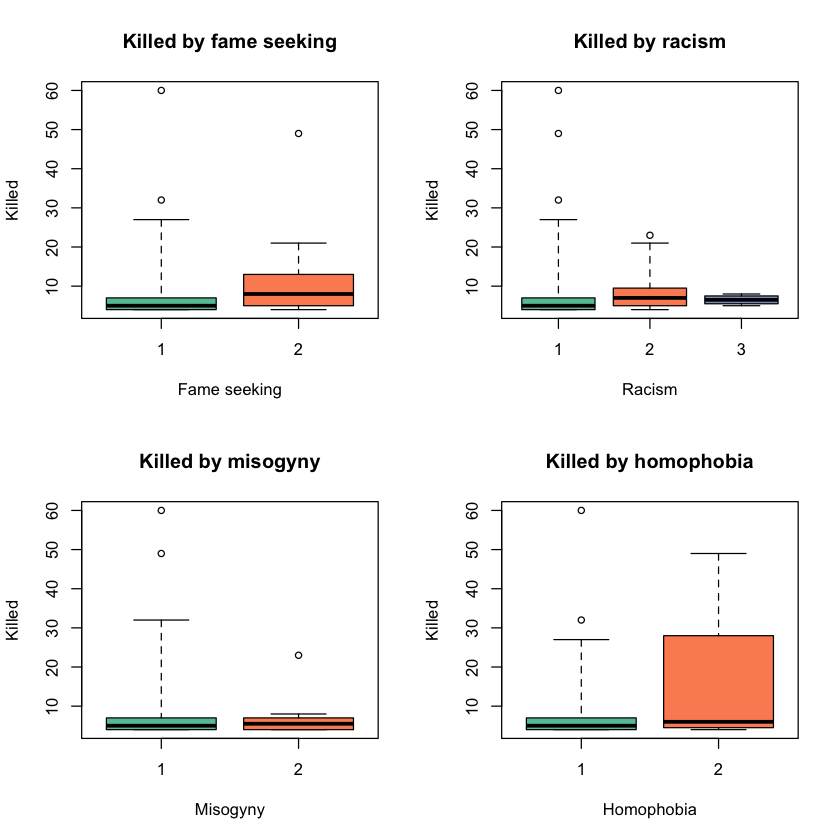

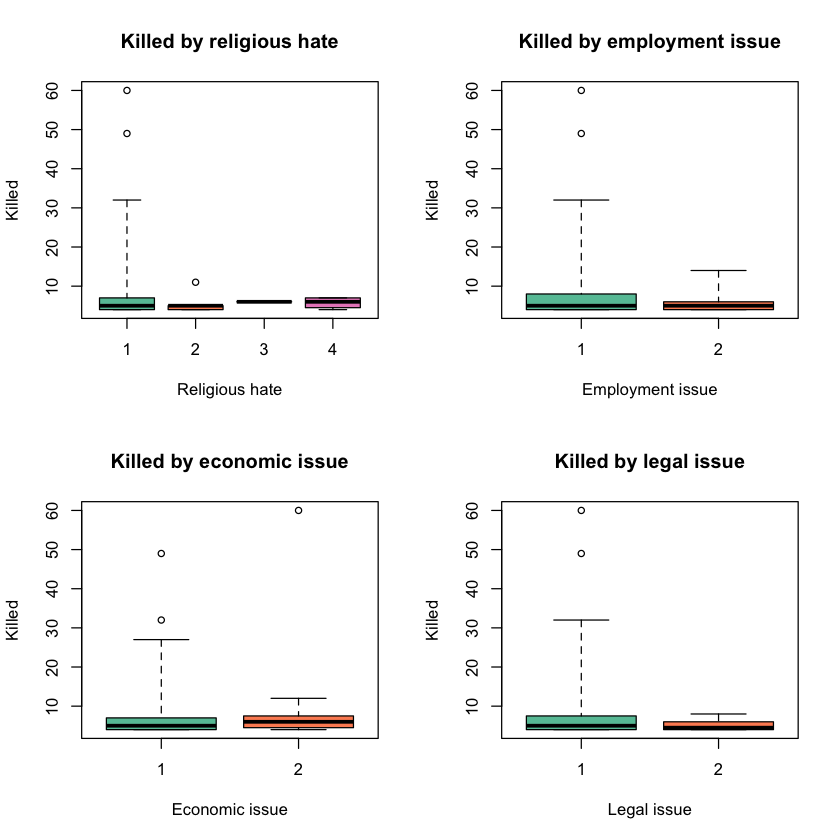

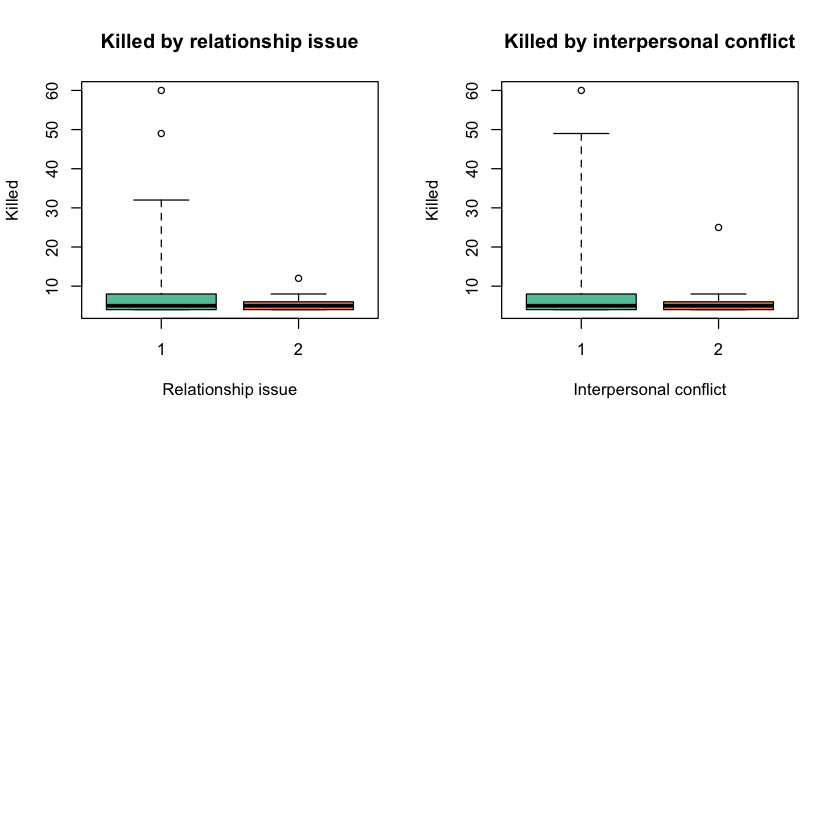

In [9]:
par(mfrow = c(2,2))
# we now look at the adjusted boxplots by level of the categorical variables which determine the motives behind the shooting
# we expect fame-seeking motivations to result in more severe shootings on average 
adjbox(shooting$Number.Killed ~ shooting$Motive..Fame.Seeking, freq = F, main = 'Killed by fame seeking', xlab = 'Fame seeking', ylab ='Killed', col = brewer.pal(8, 'Set2'))
# people who seeked fame tended on average to make more victims than people who did not
# all these findings are consistent with the thesis that social reinforcement is a powerful agent in determining the effort
# and adherence of a person to their own intentions. Declaring one's own intention makes one more likely to diligently push through
adjbox(shooting$Number.Killed ~ shooting$Motive..Racism.Xenophobia, freq = F, main = 'Killed by racism', xlab = 'Racism', ylab ='Killed', col = brewer.pal(8, 'Set2'))
# racist motivations tend to result in more severe shootings
adjbox(shooting$Number.Killed ~ shooting$Motive..Misogyny, freq = F, main = 'Killed by misogyny', xlab = 'Misogyny', ylab ='Killed', col = brewer.pal(8, 'Set2'))
adjbox(shooting$Number.Killed ~ shooting$Motive..Homophobia, freq = F, main = 'Killed by homophobia', xlab = 'Homophobia', ylab ='Killed', col = brewer.pal(8, 'Set2'))
adjbox(shooting$Number.Killed ~ shooting$Motive..Religious.Hate, freq = F, main = 'Killed by religious hate', xlab = 'Religious hate', ylab ='Killed', col = brewer.pal(8, 'Set2'))
adjbox(shooting$Number.Killed ~ shooting$Motive..Employment.Issue, freq = F, main = 'Killed by employment issue', xlab = 'Employment issue', ylab ='Killed', col = brewer.pal(8, 'Set2'))
adjbox(shooting$Number.Killed ~ shooting$Motive..Economic.Issue, freq = F, main = 'Killed by economic issue', xlab = 'Economic issue', ylab ='Killed', col = brewer.pal(8, 'Set2'))
adjbox(shooting$Number.Killed ~ shooting$Motive..Legal.Issue, freq = F, main = 'Killed by legal issue', xlab = 'Legal issue', ylab ='Killed', col = brewer.pal(8, 'Set2'))
adjbox(shooting$Number.Killed ~ shooting$Motive..Relationship.Issue, freq = F, main = 'Killed by relationship issue', xlab = 'Relationship issue', ylab ='Killed', col = brewer.pal(8, 'Set2'))
adjbox(shooting$Number.Killed ~ shooting$Motive..Interpersonal.Conflict., freq = F, main = 'Killed by interpersonal conflict', xlab = 'Interpersonal conflict', ylab ='Killed', col = brewer.pal(8, 'Set2'))

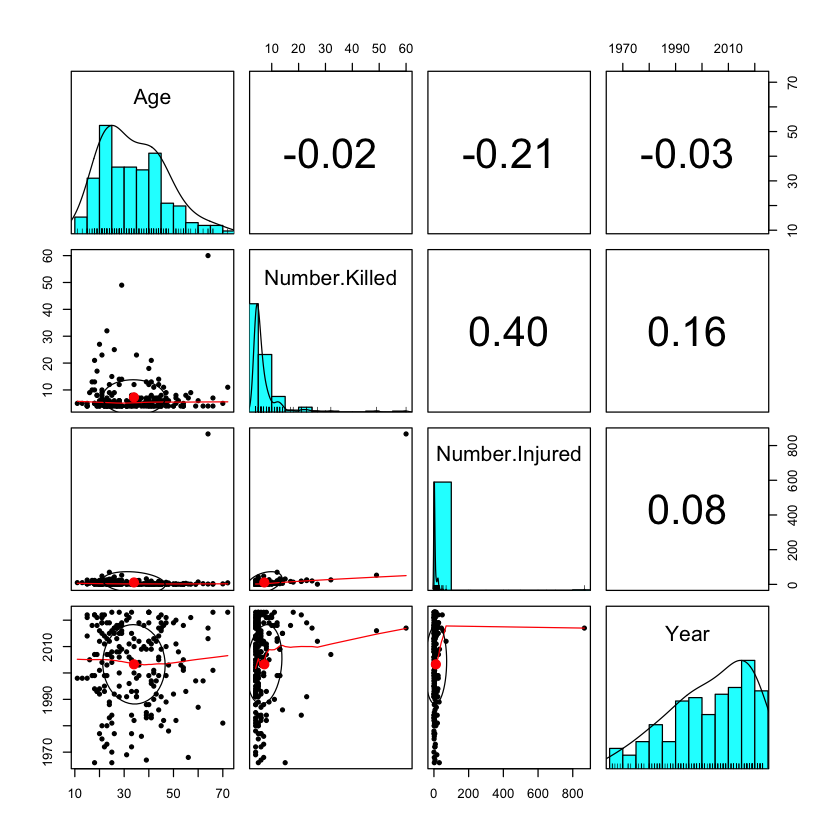

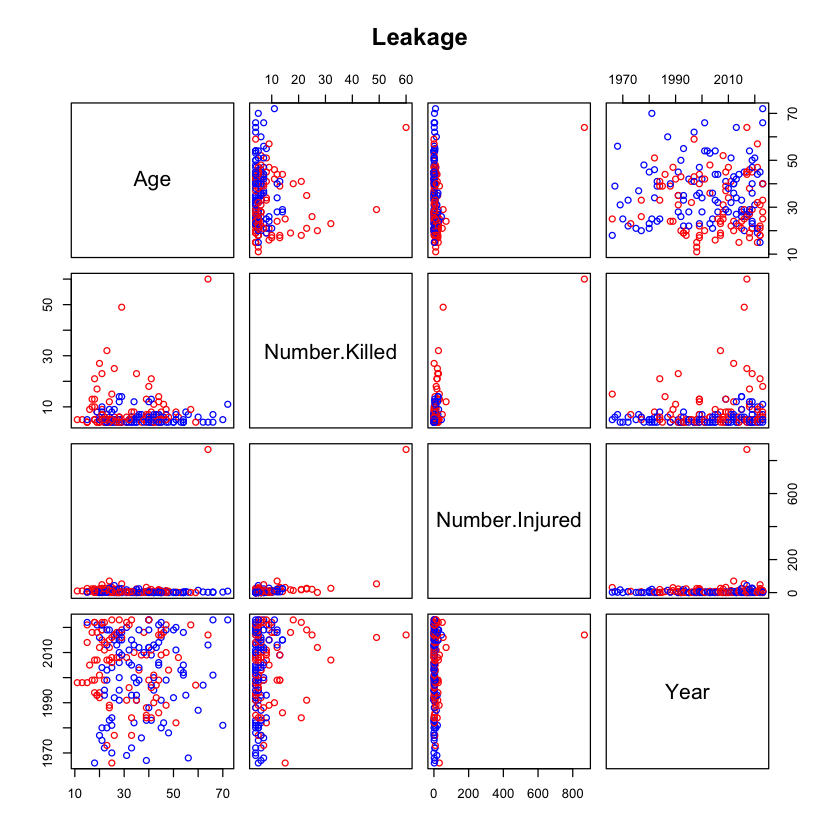

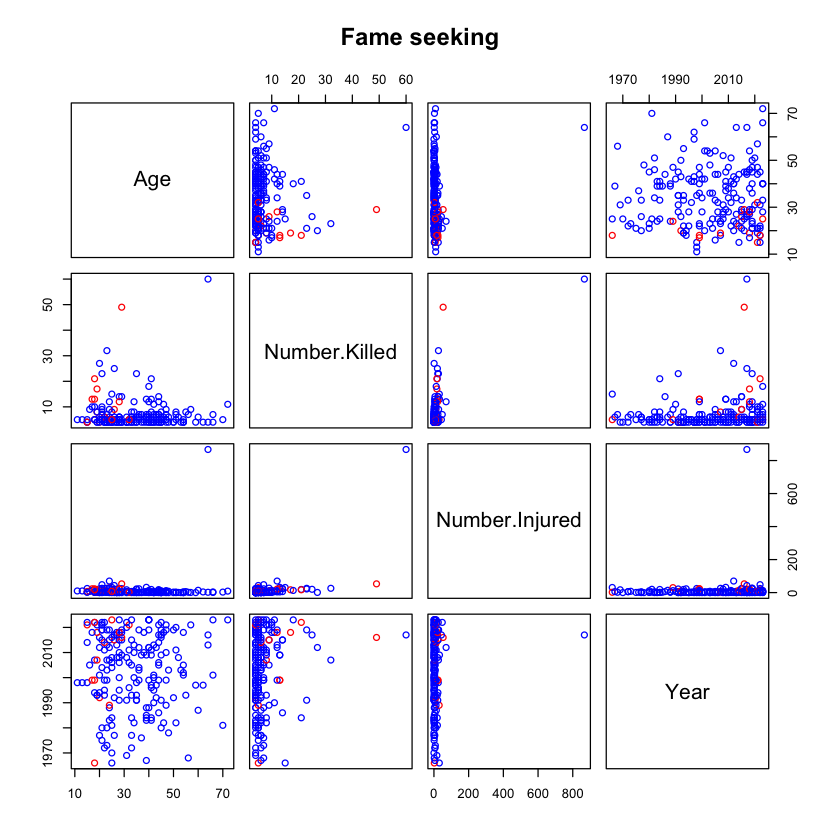

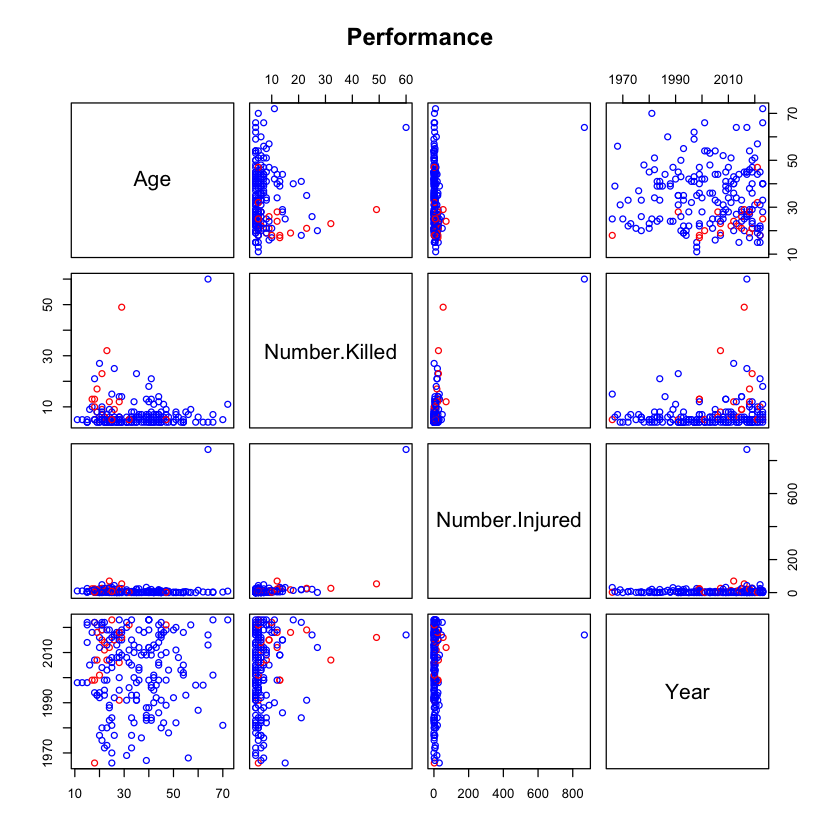

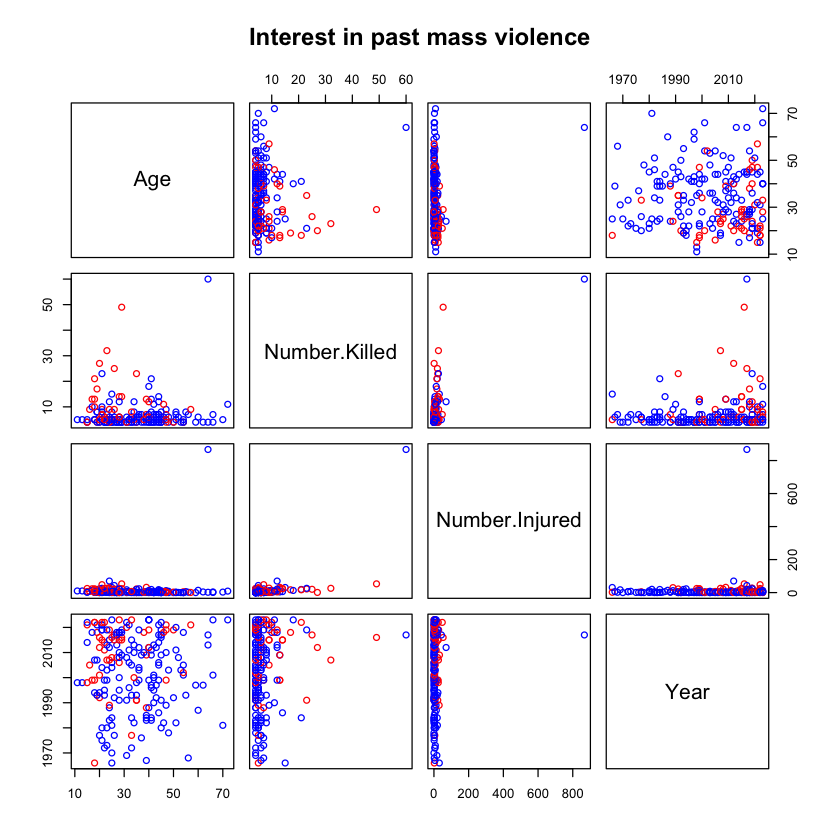

In [10]:
# correlation between continuous variables
library(psych)
pairs.panels(shooting[, c('Age', 'Number.Killed', 'Number.Injured', 'Year')], smooth = TRUE, density = TRUE, ellipses = TRUE, method = 'spearman', cor = TRUE, alpha = 0.01)
colors <- c('blue', 'red', 'green', 'yellow', 'purple')
shooting$Leakage. <- as.numeric(as.factor(shooting$Leakage.))
pairs(shooting[, c('Age', 'Number.Killed', 'Number.Injured', 'Year')], col = colors[unclass(shooting[,'Leakage.'])], main = 'Leakage')
shooting$Motive..Fame.Seeking <- as.numeric(as.factor(shooting$Motive..Fame.Seeking))
pairs(shooting[, c('Age', 'Number.Killed', 'Number.Injured', 'Year')], col = colors[unclass(shooting[,'Motive..Fame.Seeking'])], main = 'Fame seeking')
shooting$Performance <- as.numeric(as.factor(shooting$Performance))
pairs(shooting[, c('Age', 'Number.Killed', 'Number.Injured', 'Year')], col = colors[unclass(shooting[,'Performance'])], main = 'Performance')
shooting$Interest.in.Past.Mass.Violence <- as.numeric(as.factor(shooting$Interest.in.Past.Mass.Violence))
pairs(shooting[, c('Age', 'Number.Killed', 'Number.Injured', 'Year')], col = colors[unclass(shooting[,'Interest.in.Past.Mass.Violence'])], main = 'Interest in past mass violence')
# the groups aren't clearly separated by categorical data, looking at bivariate data

corrplot 0.92 loaded



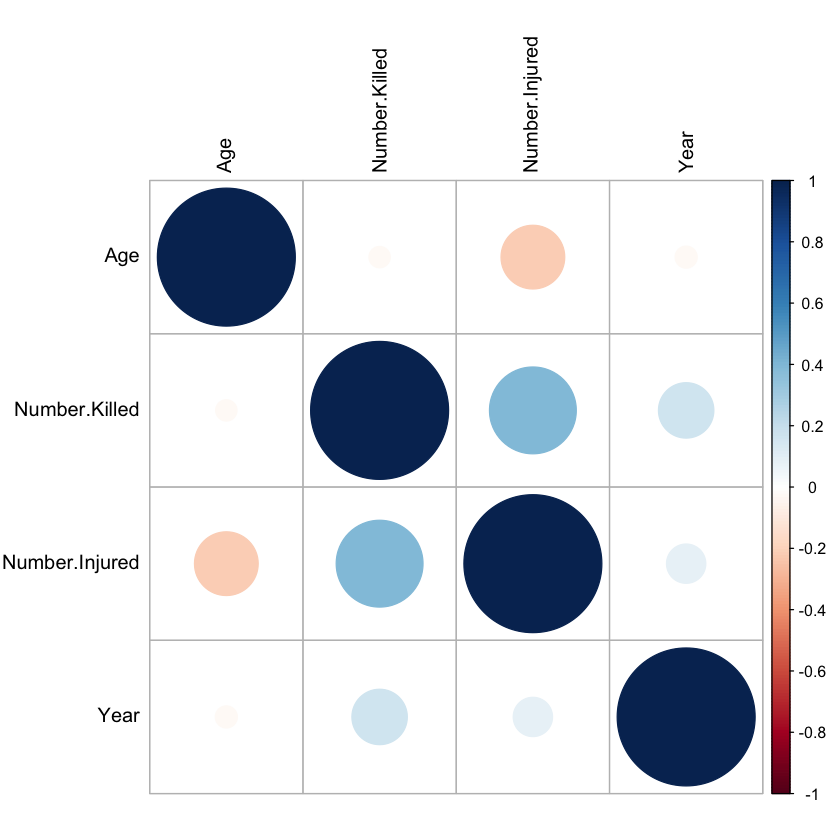

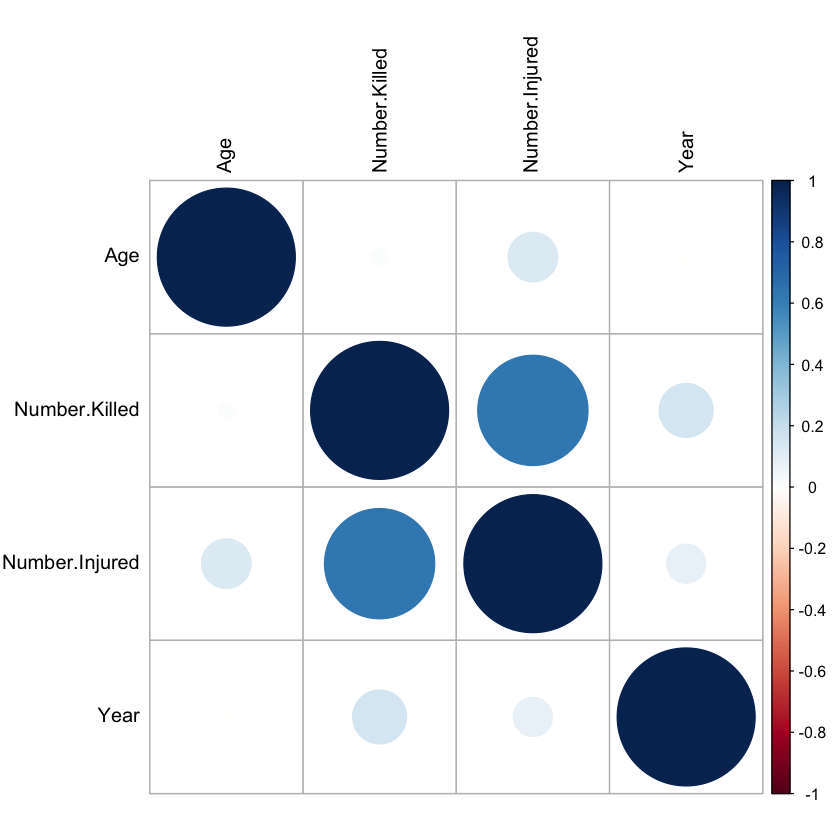

In [11]:
# visualize correlation plot
library(corrplot)
par(mfrow = c(1,1))
corrplot(cor(shooting[c('Age', 'Number.Killed', 'Number.Injured', 'Year')], method = 'spearman'), tl.col = 'black')
corrplot(cor(shooting[c('Age', 'Number.Killed', 'Number.Injured', 'Year')], method = 'pearson'), tl.col = 'black')

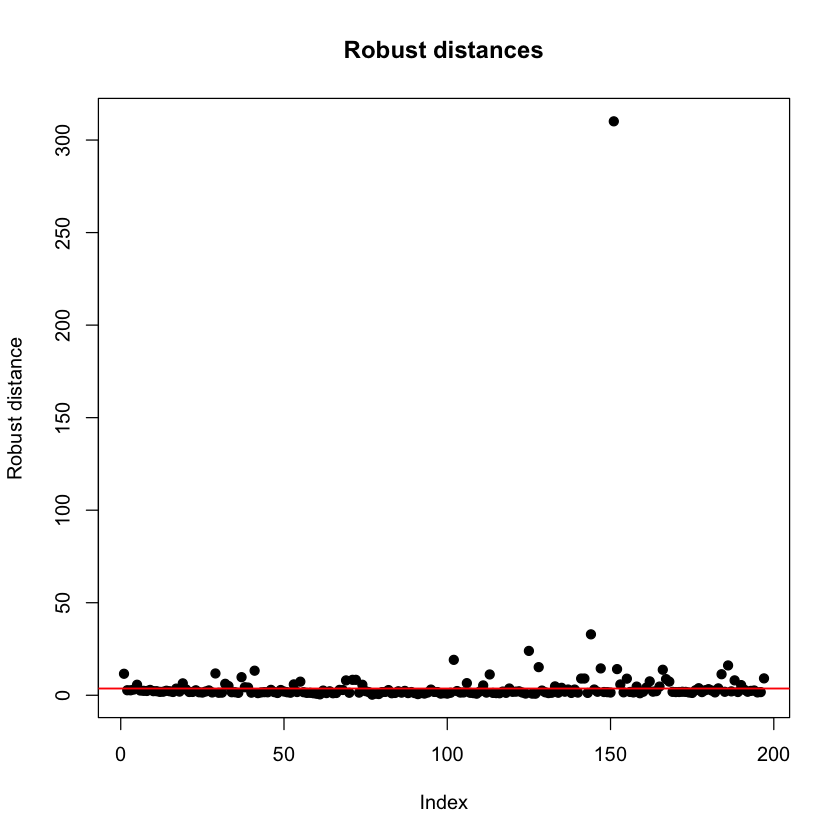

In [12]:
# investigate outliers in continuous variables
library(robustbase)
fmcd <- covMcd(shooting[c('Age', 'Number.Killed', 'Number.Injured', 'Year')], alpha = 0.75, cor = TRUE)
rd <- sqrt(fmcd$mah)
plot(1:nrow(shooting[c('Age', 'Number.Killed', 'Number.Injured', 'Year')]), rd, pch = 19, xlab = 'Index', ylab = 'Robust distance', main = 'Robust distances')
cutoff <- sqrt(qchisq(0.99, 4))
abline(h= cutoff, lwd = 1.5, col = 'red')
# we clearly see one major outlier (the Las Vegas shooting), 3 other instances which could be problematic and a number of mild outliers

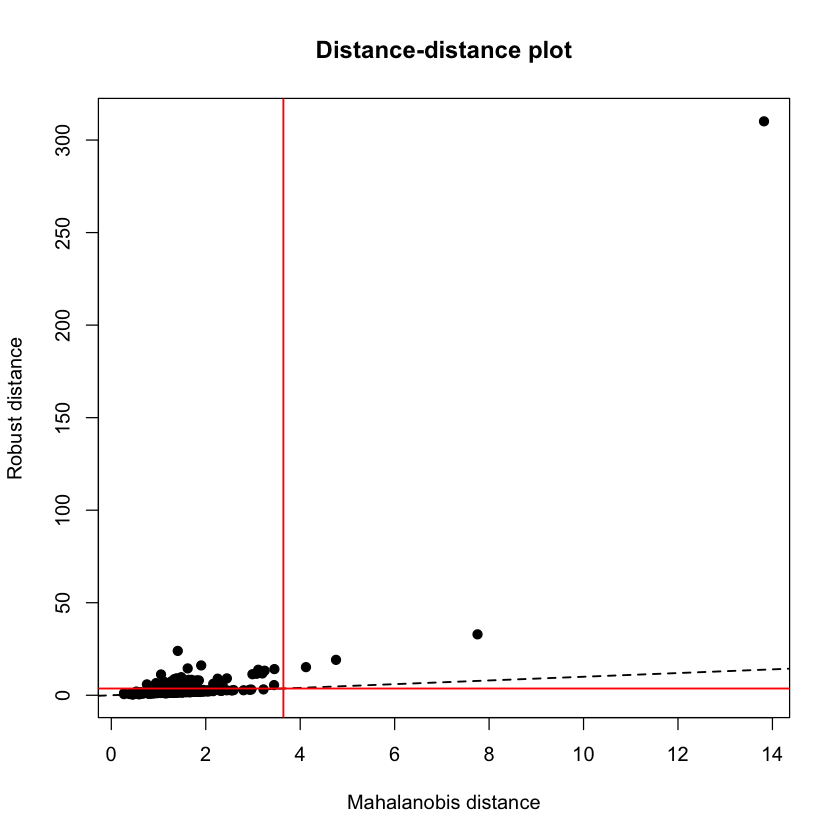

In [13]:
# differences between the robust and classical fit through a distance-distance plot
ccenter <- colMeans(shooting[c('Age', 'Number.Killed', 'Number.Injured', 'Year')])
ccov <- cov(shooting[c('Age', 'Number.Killed', 'Number.Injured', 'Year')])
md <- sqrt(mahalanobis(shooting[c('Age', 'Number.Killed', 'Number.Injured', 'Year')], center = ccenter, cov = ccov))
plot(md, rd, pch = 19, xlab = 'Mahalanobis distance', ylab = 'Robust distance', main = 'Distance-distance plot')
abline(c(0,1), lwd = 1.5, lty = 2)
abline(h = cutoff, lwd = 1.5, col = 'red')
abline(v = cutoff, lwd = 1.5, col = 'red')
# we clearly see that 4 instances are considered outliers both by the Mahalanobis distance and thtough robust distances in Mcd
# there is quite a number of outliers according to the robust distance. However, we only remove extreme outliers in this case,
# due to the fact that the dataset is rather small

In [14]:
# investigate outliers before removing them
xoutl <- which(fmcd$mah > cutoff ^ 2); xoutl # outliers with robust distances
xoutlm <- which(md^2 > cutoff^2); xoutlm # outliers with mahalanobis distance

[1]   1   5  19  29  32  33  37  38  39  41  53  55  69  71  72  74 102 106 111
[20] 113 119 125 128 133 135 141 142 144 147 151 152 153 155 158 161 162 165 166
[39] 167 168 177 183 184 186 188 190 197

103 129 145 152 
102 128 144 151

In [15]:
print(shooting[c(102, 128, 144, 151),])
# as we can see, these outliers are the ones that had most victims, and are considered outliers by both the
# Mahalanobis distance and the robust distance (found through reweighed Mcd)
# we delete only these outliers, as they could strongly impact the analysis.

    Day.of.Week Month Year State Urban.Suburban.Rural Location
103      Monday     4 2007    VA                    2        1
129      Friday    12 2012    CT                    1        0
145      Sunday     6 2016    FL                    0        5
152      Sunday    10 2017    NV                    0        8
    Insider.or.Outsider Multiple.Locations Armed.Person.on.Scene Number.Killed
103                   1                  1                     0            32
129                   1                  1                     0            27
145                   0                  0                     0            49
152                   0                  0                     1            60
    Number.Injured Age Gender Race Immigrant Military.Service Criminal.Record
103             26  23      0    3         1                0               0
129              1  20      0    0         0                0               0
145             53  29      0    4         0            

In [16]:
shooting <- shooting[-c(102, 128, 144, 151),] # delete rows
nrow(shooting) # check that outliers have been removed

[1] 193

In [17]:
# save dataframe
file_path <- "/Users/alessia/Desktop/shooting/shooting.save.csv"
write.csv(shooting, file = file_path, row.names = TRUE)

Caricamento del pacchetto richiesto: carData


Caricamento pacchetto: ‘car’


Il seguente oggetto è mascherato da ‘package:psych’:

    logit


Il seguente oggetto è mascherato da ‘package:dplyr’:

    recode




[1] 0.1818182


[1] 0.04804216

[1] 2


[1] 2.740915e-07

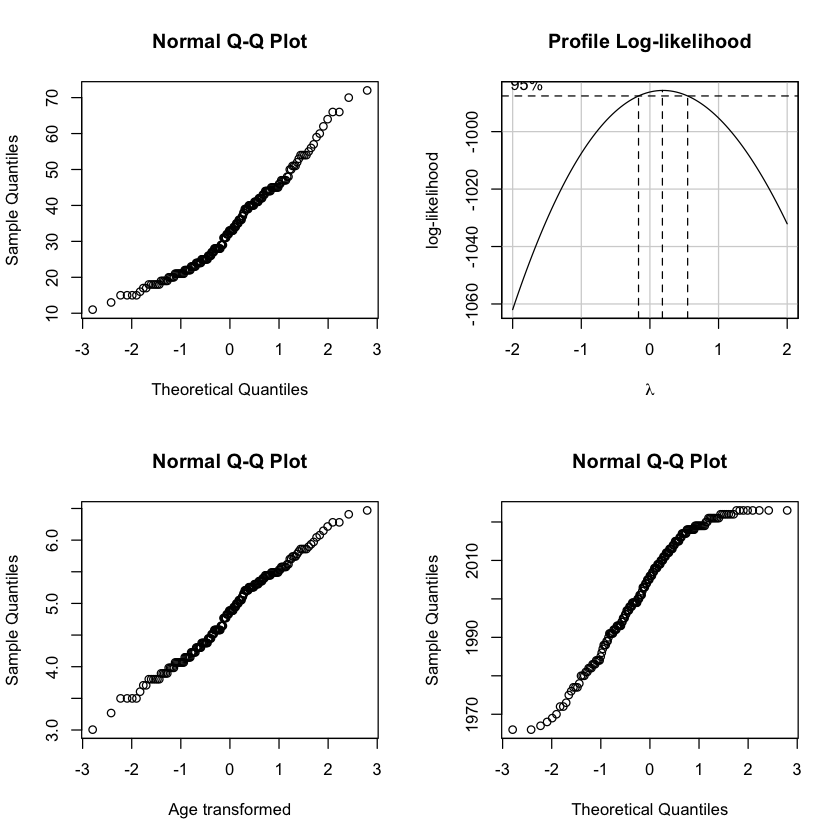

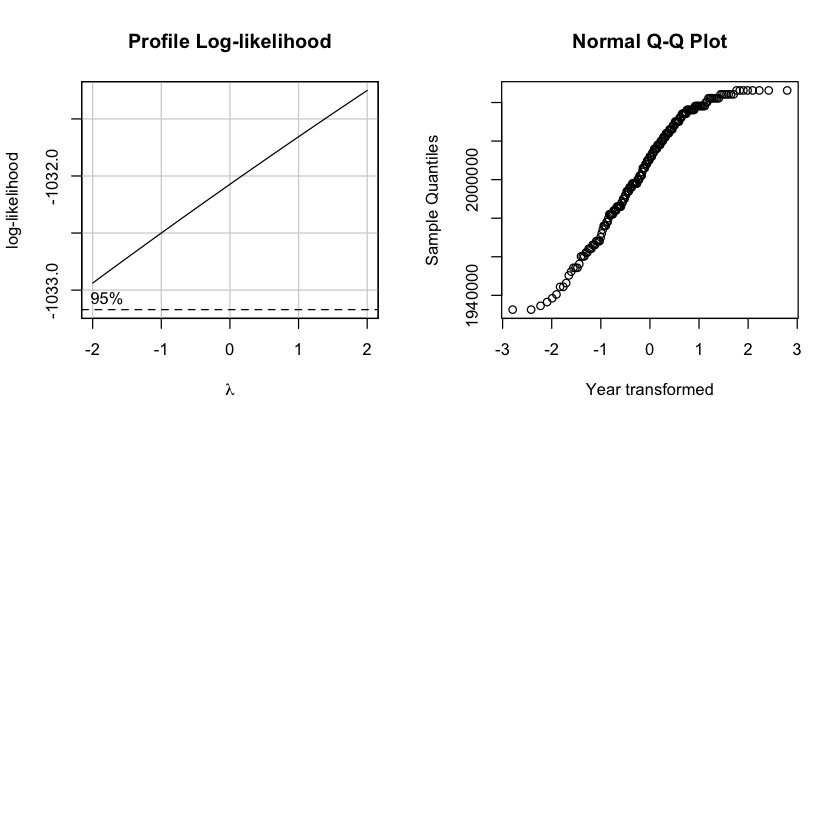

In [18]:
# transform continuous predictor variable that will be used in linear regression (Age and Years)
# to predict Number.Killed
attach(shooting)
library(car)
par(mfrow = c(2,2))
qqnorm(Age)
bcAge <- boxCox(Age ~ 1) # also gives the log-likelihood plot
lambdaAge <- bcAge$x[which.max(bcAge$y)]
print(lambdaAge)
# transform 
transAge<- bcPower(Age, lambdaAge)
qqnorm(transAge, xlab = 'Age transformed') # still skewed
x <- shapiro.test(transAge)$p.value; x
if (x > 0.05){
  print('Cannot reject normality assumption')
}

qqnorm(Year)
bcYear <- boxCox(Year ~ 1) # also gives the log-likelihood plot
lambdaYear <- bcYear$x[which.max(bcYear$y)]
print(lambdaYear)
# transform 
transYear<- bcPower(Year, lambdaYear)
qqnorm(transYear, xlab = 'Year transformed') # still skewed
x <- shapiro.test(transYear)$p.value; x
if (x > 0.05){
  print('Cannot reject normality assumption')
}
# Year cannot be made more normal, therefore, we keep the original variable

In [19]:
# save dataset with transformed Age
shooting.trans <- shooting[,-c(12)]
shooting.trans['Age'] <- transAge

# save dataset with transformed variable
file_path <- "/Users/alessia/Desktop/shooting/shooting.trans.csv"
write.csv(shooting.trans, file = file_path, row.names = TRUE)